In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt
import ptitprince as pt ## make sure to have installed this in terminal first

def export_fig(axis,text, fname):
    if savefigs:
        axis.text()
        axis.savefig(fname, bbox_inches='tight')

In [2]:
path = "/Users/dhewitt/Data/pps/Exports/"
fileType = ".csv"
#fileName = ("PPSERDDataLong_Grouped_noav_" + version + "_plotting" + fileType) ## raw data
fileName = ("adjustedRQ1data_130225" + fileType) ## predicted data from lmes
version = "13-02-25"
figOutName = ("ERD_Grouped_noav_" + version)

figs_dir = (path + 'figs/')
print(fileName)
savefigs = True

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir(figs_dir):
        os.makedirs(figs_dir)

adjustedRQ1data_130225.csv


In [3]:
## Set these for each figure

measureType = "ERD"
xAxis= "Cue" #Specify the name of your x axis, this should matach the df
xAxisCond = "Block"
xAxisInt = "Cue + Block"
#yAxis = "Pupil Diameter (mms)" #specify the name of your y axis, this should match the df
yAxis = "ERD%" #might have to rename predictedvals in the actual csv column name
zAxis = "Timebin"

In [4]:
## Specific bits of the data to fig

electrodeCluster = 1 # 1 = "Frontal", 3 = "Central", 4 = "Parietal", 5 = "Occipital"
freqBand = 4

As first step, load the dataset

In [5]:
print(fileName)
df = pd.read_csv(path + measureType + "/" + fileName)

#dfnew = pd.DataFrame()
df = df.loc[(df['Grouping2'] == electrodeCluster) & (df['FreqBand'] == freqBand)]
#df['Cue + Block'] = df['Cue'].astype(str) + ' ' + df['Block'].astype(str)
df['Cue + Block'] = df['Cue'].astype(str) + ' ' + df['Block'].astype(str)
## Averaging over block repetitions and all electrodes in the cluster
df = df.groupby(['ID', 'Timebin', 'Cue', 'Block', 'Cue + Block']).mean().reset_index() #averaging because of repetitions which have the same predicted value
df

#box_showmeans = True, box_meanprops={"marker": "_","markeredgecolor": "black","markersize": lW},
               

adjustedRQ1data_130225.csv


,ID,Timebin,Cue,Block,Cue + Block,Unnamed: 0,X,ElectrodeID,FreqBand,EEGPowerChange,...,Handed,Elec_Lpain,Elec_Lunp,Elec_Rpain,Elec_Runp,STAI_Total,PupilDiameter,GazeDirection,z_score,ERD%
0,2,1,Neutral,1,Neutral 1,32294.0,1162.666667,11.666667,4.0,16.735950,...,1.0,4.5,5.665,3.665,4.665,66.0,-0.000048,20.919144,0.685922,15.272032
1,2,1,Neutral,2,Neutral 2,32297.0,1290.666667,11.666667,4.0,13.847069,...,1.0,4.5,5.665,3.665,4.665,66.0,-0.014850,20.552630,0.558914,7.514011
2,2,1,Pain,1,Pain 1,32321.0,2314.666667,11.666667,4.0,16.770356,...,1.0,4.5,5.665,3.665,4.665,66.0,0.000529,21.648459,0.687435,12.629317
3,2,1,Pain,2,Pain 2,32324.0,2442.666667,11.666667,4.0,14.595140,...,1.0,4.5,5.665,3.665,4.665,66.0,-0.014455,21.677765,0.591802,8.412752
4,2,2,Neutral,1,Neutral 1,32300.0,1418.666667,11.666667,4.0,-2.915642,...,1.0,4.5,5.665,3.665,4.665,66.0,-0.049670,14.955887,-0.178052,6.593474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,30,2,Pain,2,Pain 2,34922.0,117898.666667,11.666667,4.0,11.799794,...,1.0,5.5,5.830,6.830,7.000,81.0,-0.082912,-0.806819,0.468906,2.027211
308,30,3,Neutral,1,Neutral 1,34898.0,116874.666667,11.666667,4.0,-11.853001,...,1.0,5.5,5.830,6.830,7.000,81.0,-0.046571,-3.262347,-0.570979,-1.967858
309,30,3,Neutral,2,Neutral 2,34901.0,117002.666667,11.666667,4.0,-9.901392,...,1.0,5.5,5.830,6.830,7.000,81.0,-0.068724,-0.150107,-0.485177,-3.245973
310,30,3,Pain,1,Pain 1,34925.0,118026.666667,11.666667,4.0,-10.090571,...,1.0,5.5,5.830,6.830,7.000,81.0,0.073690,-3.334825,-0.493495,-5.224041


In [6]:
figSize = 3
timesSmaller = 8/figSize
lW = 2.4/timesSmaller #indiivdual datapoint line width
dotsize = 8/timesSmaller #indiv data point dot size
eW = 1.6/timesSmaller #bar chart line width
spineW = 1/timesSmaller
sns.set(style="white",font_scale=2.8/timesSmaller)
boxWidth = 0.65/timesSmaller
violinWidth = 1.5/timesSmaller
ort="v"; 
sigma = .15

In [7]:
pal = "Set2"
#pal = sns.color_palette('vlag',4)
#pal = sns.color_palette(n_colors=8)
#pal = sns.color_palette('muted',8)
#pal = sns.color_palette('magma',4)
#pal = sns.color_palette('Spectral',4)

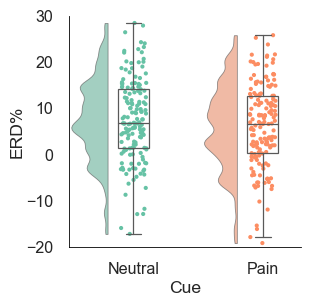

In [108]:
# Main effects of cue

#f, ax = plt.subplots(figsize=(7, 7))
#f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxis, y = yAxis, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-20, 30)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig1cue_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

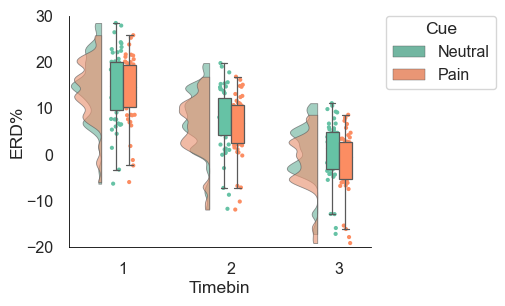

In [109]:
#Cue x Phase Interactions

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = zAxis, y = yAxis, hue = xAxis, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
                 box_showmeans = True, box_meanprops={"marker": "_","markeredgecolor": "black","markersize": lW},
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-20, 30)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig2cuephase_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

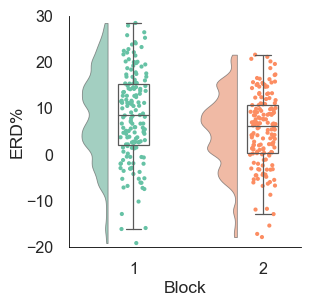

In [110]:
# Block main effect

#f, ax = plt.subplots(figsize=(7, 7))
#f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxisCond, y = yAxis, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-20, 30)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig3cond_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

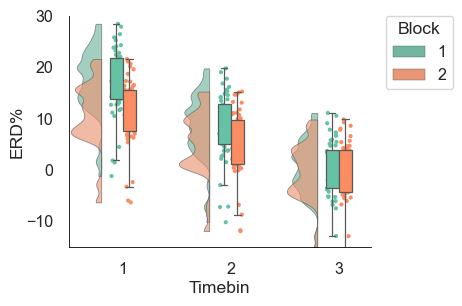

In [111]:
#Block x Phase Interactions

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = zAxis, y = yAxis, hue = xAxisCond, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-15, 30)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig4condphase_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

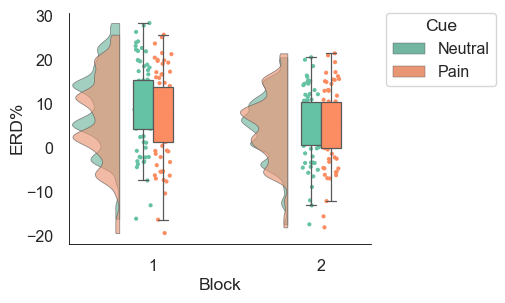

In [112]:
#Block x Cue Interactions

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxisCond, y = yAxis, hue = xAxis, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig4condcue_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

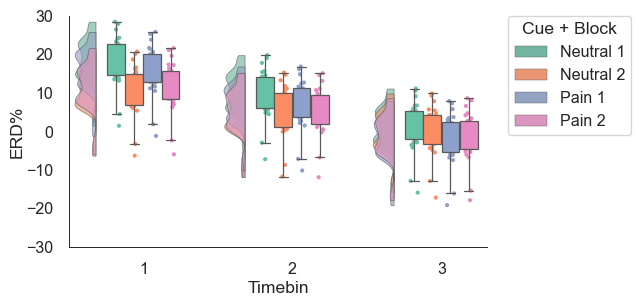

In [113]:
#Phase Interactions

sigma = 0.25

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.8, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = zAxis, y = yAxis, hue = xAxisInt, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth*0.5, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth*2,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-30, 30)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig4condphase_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

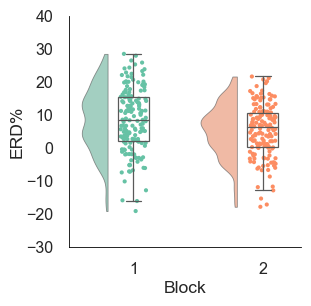

In [114]:
# Main effects of block

#f, ax = plt.subplots(figsize=(7, 7))
#f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxisCond, y = yAxis, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-30, 40)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig3cond_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + "_elrepav.svg", format='svg', dpi=1200, bbox_inches='tight')

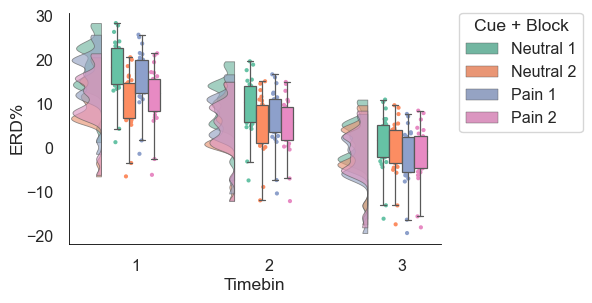

In [115]:
#Phase Interactions

spineW = 1/timesSmaller
boxWidth = 1/timesSmaller
violinWidth = 1.2/timesSmaller
sigma = .15
ort="v"

#f, ax = plt.subplots(figsize=(7, 7))
#f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize*1.6, figSize)) # for a squarer chart

ax=pt.RainCloud(x = zAxis, y = yAxis, hue = xAxisInt, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig4condphase_" + str(freqBand) + "_elrepav.Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

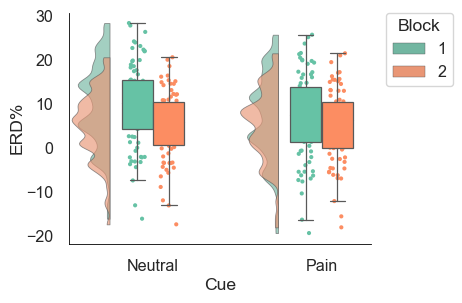

In [116]:
#Cue x block Interactions

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxis, y = yAxis, hue = xAxisCond, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig4CueBlock_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + "_elrepav.svg", format='svg', dpi=1200, bbox_inches='tight')

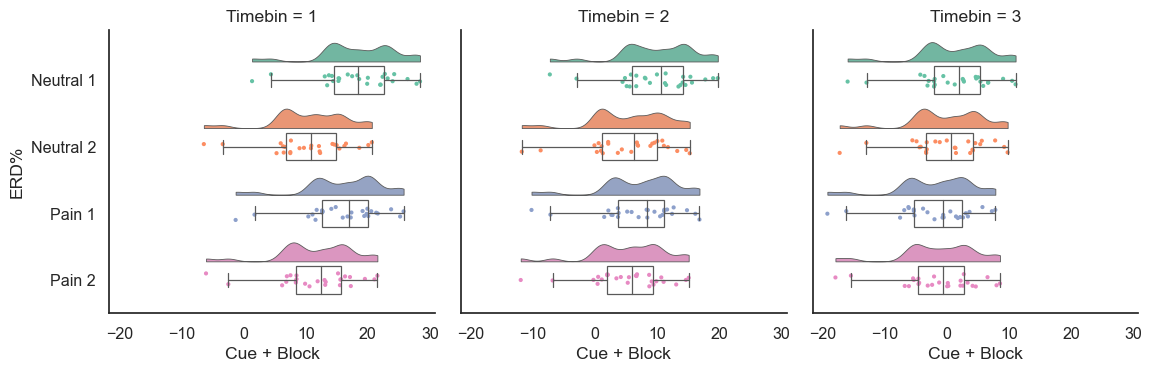

In [117]:
# Rainclouds with FacetGrid


g = sns.FacetGrid(df, col = zAxis, height = figSize*1.3)
g = g.map_dataframe(pt.RainCloud, x = xAxisInt, y = yAxis, data = df,
                    orient = "h", box_showfliers = False, dodge = True, 
                    width_viol = violinWidth*1.3,width_box = boxWidth*1.1, linewidth = eW, 
                    box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

#g.fig.subplots_adjust(top=0.75)
#g.fig.suptitle("Pupil Diameter",  fontsize=26)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1


#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig5CueBlock_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + "_elrepav.svg", format='svg', dpi=1200, bbox_inches='tight')

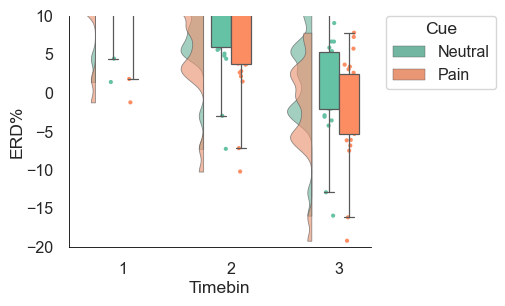

In [118]:
#Block x Phase x Cue Separate Interactions --- cond block

conddf = df.loc[(df['Block'] == 1)]

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = zAxis, y = yAxis, hue = xAxis, data = conddf, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-20, 10)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig7conddata-condcuephase_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

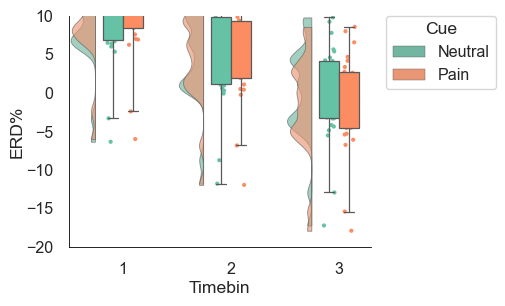

In [119]:
#Block x Phase x Cue Separate Interactions --- extn block

extdf = df.loc[(df['Block'] == 2)]

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = zAxis, y = yAxis, hue = xAxis, data = extdf, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-20, 10)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig7extndata-condcuephase_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

## Congruency

In [16]:
## Set these for each figure

measureType = "ERD"
xAxis= "Congruency" #Specify the name of your x axis, this should matach the df
xAxisHem = "Hemisphere"
xAxisInt = "Cue + Block"
#yAxis = "Pupil Diameter (mms)" #specify the name of your y axis, this should match the df
yAxis = "ERD%" #might have to rename the actual csv column name
zAxis = "Timebin"
version  = "130225" 
savefigs = True
ort="v"

## Specific bits of the data to fig

electrodeCluster = 1 # 1 = "Frontal", 3 = "Central", 4 = "Parietal", 5 = "Occipital"
freqBand = 4

In [17]:
path = "/Users/dhewitt/Data/pps/Exports/"
fileType = ".csv"
#fileName = ("PPSERDDataLong_Grouped_noav_" + version + "_plotting" + fileType)
fileName = ("adjustedRQ2data_130225" + fileType) ## predicted data from lmes

figOutName = ("ERD_Grouped_" + version)

figs_dir = (path + 'figs/')
print(fileName)

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir(figs_dir):
        os.makedirs(figs_dir)

adjustedRQ2data_130225.csv


In [18]:
print(fileName)
df = pd.read_csv(path + measureType + "/" + fileName)
#df = df.rename(columns={'predictedvals' : 'ERD%', 'congruency' : 'Congruency'})
df = df.loc[(df['Grouping2'] == electrodeCluster) & (df['FreqBand'] == freqBand) & (df['Block'] == 2)].dropna()

## Averaging over block repetitions and all electrodes in the cluster
df = df.groupby(['ID', 'Timebin', 'Cue', 'ERD%']).mean().reset_index() #averaging because of repetitions which have the same predicted value
df

adjustedRQ2data_130225.csv


,ID,Timebin,Cue,ERD%,Unnamed: 0,X,ElectrodeID,FreqBand,EEGPowerChange,Block,...,Age,Handed,Elec_Lpain,Elec_Lunp,Elec_Rpain,Elec_Runp,STAI_Total,PupilDiameter,GazeDirection,z_score
0,2,1,1,7.761013,2.0,906.666667,11.666667,4.0,9.933673,2.0,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.024625,32.361818,0.456051
1,2,1,1,9.077155,20.0,3210.666667,11.666667,4.0,9.143026,2.0,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.004264,10.013699,0.417845
2,2,1,1,11.494125,11.0,1674.666667,11.666667,4.0,7.794632,2.0,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.000397,31.552505,0.352688
3,2,1,1,12.810268,29.0,3978.666667,11.666667,4.0,31.509230,2.0,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.028533,12.783036,1.498629
4,2,2,1,1.308695,5.0,1162.666667,11.666667,4.0,3.373558,2.0,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.070616,22.388541,0.139052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,30,2,1,9.203496,886.0,119434.666667,11.666667,4.0,29.149427,2.0,...,28.0,1.0,5.00,5.33,6.33,6.33,81.0,-0.062887,4.545231,1.384598
303,30,3,1,-10.078335,862.0,116618.666667,11.666667,4.0,-13.362189,2.0,...,28.0,1.0,6.00,6.33,7.33,7.67,81.0,0.024513,-6.086957,-0.669656
304,30,3,1,-6.345222,871.0,117386.666667,11.666667,4.0,-9.735524,2.0,...,28.0,1.0,6.00,6.33,7.33,7.67,81.0,-0.075319,-5.640092,-0.494408
305,30,3,1,-0.981934,880.0,118922.666667,11.666667,4.0,-18.554013,2.0,...,28.0,1.0,5.00,5.33,6.33,6.33,81.0,-0.051669,4.012073,-0.920536


In [19]:
df['Congruency'] = df['Congruency'].replace({1 : "Incongruent", 2 : "Congruent"})
df['Congruency'] = pd.Categorical(df['Congruency'], categories=["Congruent", "Incongruent"], ordered=True)

df

,ID,Timebin,Cue,ERD%,Unnamed: 0,X,ElectrodeID,FreqBand,EEGPowerChange,Block,...,Age,Handed,Elec_Lpain,Elec_Lunp,Elec_Rpain,Elec_Runp,STAI_Total,PupilDiameter,GazeDirection,z_score
0,2,1,1,7.761013,2.0,906.666667,11.666667,4.0,9.933673,2.0,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.024625,32.361818,0.456051
1,2,1,1,9.077155,20.0,3210.666667,11.666667,4.0,9.143026,2.0,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.004264,10.013699,0.417845
2,2,1,1,11.494125,11.0,1674.666667,11.666667,4.0,7.794632,2.0,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.000397,31.552505,0.352688
3,2,1,1,12.810268,29.0,3978.666667,11.666667,4.0,31.509230,2.0,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.028533,12.783036,1.498629
4,2,2,1,1.308695,5.0,1162.666667,11.666667,4.0,3.373558,2.0,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.070616,22.388541,0.139052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,30,2,1,9.203496,886.0,119434.666667,11.666667,4.0,29.149427,2.0,...,28.0,1.0,5.00,5.33,6.33,6.33,81.0,-0.062887,4.545231,1.384598
303,30,3,1,-10.078335,862.0,116618.666667,11.666667,4.0,-13.362189,2.0,...,28.0,1.0,6.00,6.33,7.33,7.67,81.0,0.024513,-6.086957,-0.669656
304,30,3,1,-6.345222,871.0,117386.666667,11.666667,4.0,-9.735524,2.0,...,28.0,1.0,6.00,6.33,7.33,7.67,81.0,-0.075319,-5.640092,-0.494408
305,30,3,1,-0.981934,880.0,118922.666667,11.666667,4.0,-18.554013,2.0,...,28.0,1.0,5.00,5.33,6.33,6.33,81.0,-0.051669,4.012073,-0.920536


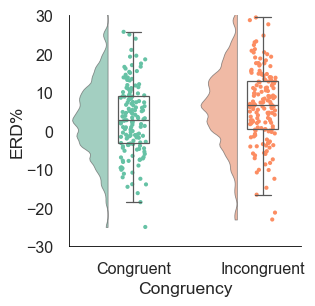

In [20]:
# Main effects of congruency

#f, ax = plt.subplots(figsize=(7, 7))
#f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxis, y = yAxis, data = df, palette = pal, bw = sigma*0.75,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth, 
                box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-30, 30)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig6congruency_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

In [47]:
fileName = ("adjustedRQ2hemdata_180324" + fileType) ## predicted data from lmes

figOutName = ("ERD_Grouped_hem_" + version)

print(fileName)
df = pd.read_csv(path + measureType + "/" + fileName)

adjustedRQ2hemdata_180324.csv


In [52]:
electrodeCluster = 4 # 1 = "Frontal", 3 = "Central", 4 = "Parietal", 5 = "Occipital"
freqBand = 16
df = df.loc[(df['Grouping2'] == electrodeCluster) & (df['FreqBand'] == freqBand) & (df['Block'] == 2)].dropna()
df

,Unnamed: 0,X,ID,ElectrodeID,Timebin,FreqBand,EEGPowerChange,Block,Rep,Side,...,Elec_Rpain,Elec_Runp,STAI_Total,PupilDiameter,GazeDirection,ElHem,CueSide,Cue,ElectrodeGroup,ERD%
2496,2497,85,2,19,1,16,-3.735071,2,1,1,...,4.00,5.00,66,0.015512,38.752618,Contra,left,Incongruent,Parietal,-3.028335
2497,2498,86,2,20,1,16,6.943319,2,1,1,...,4.00,5.00,66,0.015512,38.752618,Contra,left,Incongruent,Parietal,-3.028335
2498,2499,88,2,22,1,16,15.569430,2,1,1,...,4.00,5.00,66,0.015512,38.752618,Contra,left,Incongruent,Parietal,-3.028335
2499,2500,89,2,23,1,16,-5.591130,2,1,1,...,4.00,5.00,66,0.015512,38.752618,Contra,left,Incongruent,Parietal,-3.028335
2500,2501,197,2,19,2,16,1.279960,2,1,1,...,4.00,5.00,66,-0.058558,27.489831,Contra,left,Incongruent,Parietal,-3.028335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,4988,17337,30,23,2,16,-19.627123,2,2,2,...,6.33,6.33,81,-0.108885,5.827062,Ipsi,right,Incongruent,Parietal,-13.406967
4988,4989,17445,30,19,3,16,-5.540484,2,2,2,...,6.33,6.33,81,-0.125147,7.172001,Ipsi,right,Incongruent,Parietal,-13.406967
4989,4990,17446,30,20,3,16,-16.233150,2,2,2,...,6.33,6.33,81,-0.125147,7.172001,Ipsi,right,Incongruent,Parietal,-13.406967
4990,4991,17448,30,22,3,16,-21.034083,2,2,2,...,6.33,6.33,81,-0.125147,7.172001,Ipsi,right,Incongruent,Parietal,-13.406967


In [53]:
cue_left = df[df['Side'] == 1]
cue_right = df[df['Side'] == 2]
cue_left_contra = cue_left[cue_left['ElSide'] == 1].copy()
cue_left_ipsi = cue_left[cue_left['ElSide'] == -1].copy()
cue_left_contra = cue_left_contra.reset_index(drop=True)
cue_left_ipsi = cue_left_ipsi.reset_index(drop=True)
cue_right_contra = cue_right[cue_right['ElSide'] == -1].copy()
cue_right_ipsi = cue_right[cue_right['ElSide'] == 1].copy()
cue_right_contra = cue_right_contra.reset_index(drop=True)
cue_right_ipsi = cue_right_ipsi.reset_index(drop=True)
cue_left_contra['Hemisphere'] = 'Contralateral'
cue_left_ipsi['Hemisphere'] = 'Ipsilateral'
cue_right_contra['Hemisphere'] = 'Contralateral'
cue_right_ipsi['Hemisphere'] = 'Ipsilateral'
elhem_df = pd.concat([cue_left_contra, cue_left_ipsi, cue_right_contra, cue_right_ipsi])
#elhem_df['Tonic Pain'] = elhem_df['Cue'].astype(str) + ' ' + elhem_df['Hemisphere'].astype(str)
elhem_df


## Averaging over block repetitions and all electrodes in the cluster
#elhem_df = elhem_df.groupby(['ID', 'Cue', 'ElHem', 'Hemisphere', 'Tonic Pain']).mean().reset_index() #averaging because of repetitions which have the same predicted value
elhem_df = elhem_df.groupby(['ID', 'Cue', 'Hemisphere']).mean().reset_index() #averaging because of repetitions which have the same predicted value
elhem_df


,ID,Cue,Hemisphere,Unnamed: 0,X,ElectrodeID,Timebin,FreqBand,EEGPowerChange,Block,...,Age,Handed,Elec_Lpain,Elec_Lunp,Elec_Rpain,Elec_Runp,STAI_Total,PupilDiameter,GazeDirection,ERD%
0,2,Congruent,Contralateral,3132.5,370.75,17.0,2.0,16.0,-6.795503,2.0,...,32.0,1.0,4.500,5.665,3.665,4.665,66.0,-0.046117,19.115484,-3.878953
1,2,Congruent,Ipsilateral,3756.5,370.75,17.0,2.0,16.0,-2.665939,2.0,...,32.0,1.0,4.500,5.665,3.665,4.665,66.0,-0.046117,19.115484,-1.856181
2,2,Incongruent,Contralateral,3132.5,370.75,17.0,2.0,16.0,-2.999924,2.0,...,32.0,1.0,4.500,5.665,3.665,4.665,66.0,-0.039886,19.861180,-2.313007
3,2,Incongruent,Ipsilateral,3756.5,370.75,17.0,2.0,16.0,2.344918,2.0,...,32.0,1.0,4.500,5.665,3.665,4.665,66.0,-0.039886,19.861180,-2.480080
4,3,Congruent,Contralateral,3156.5,1042.75,17.0,2.0,16.0,-8.888967,2.0,...,26.0,1.0,2.835,2.670,2.665,2.835,62.0,-0.007869,-8.485820,-7.339683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,29,Incongruent,Ipsilateral,4332.5,16498.75,17.0,2.0,16.0,4.576006,2.0,...,24.0,2.0,3.000,3.000,5.000,5.165,68.0,-0.231049,1.175076,5.890985
100,30,Congruent,Contralateral,3732.5,17170.75,17.0,2.0,16.0,-19.680178,2.0,...,28.0,1.0,5.500,5.830,6.830,7.000,81.0,-0.052314,0.671370,-12.990849
101,30,Congruent,Ipsilateral,4356.5,17170.75,17.0,2.0,16.0,-12.234818,2.0,...,28.0,1.0,5.500,5.830,6.830,7.000,81.0,-0.052314,0.671370,-10.968077
102,30,Incongruent,Contralateral,3732.5,17170.75,17.0,2.0,16.0,-11.359122,2.0,...,28.0,1.0,5.500,5.830,6.830,7.000,81.0,-0.101866,1.968752,-11.424903


In [70]:
newdf = df.groupby(['ID', 'Cue', 'ElHem']).mean().reset_index() 
newdf.to_csv(path + 'checking.csv')

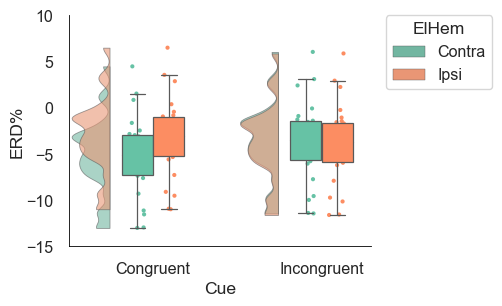

In [68]:
#Hemisphere congruency interactions

ort = 'v'

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxis, y = yAxis, hue = "ElHem", data = newdf, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .6,  dodge = True, width_box = boxWidth,  
                box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-15, 10)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig8hemcong_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + "aved.svg", format='svg', dpi=1200, bbox_inches='tight')

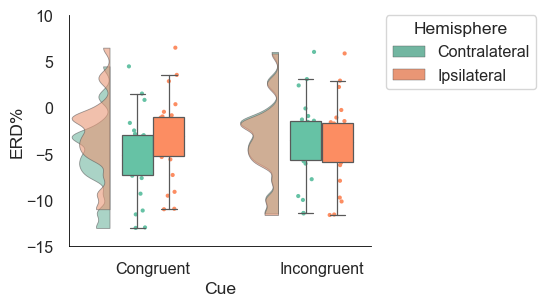

In [69]:
#Hemisphere congruency interactions

ort = 'v'

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxis, y = yAxis, hue = xAxisHem, data = elhem_df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .6,  dodge = True, width_box = boxWidth,  
                box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-15, 10)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig8hemcong_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + "aved.svg", format='svg', dpi=1200, bbox_inches='tight')

## Covariates

In [89]:
## Set these for each figure

measureType = "ERD"
xAxis = "Congruency"
xAxisHem = "Hemisphere"
version  = "130225" 
savefigs = True
ort="v"

yAxis = "ERD%" #might have to rename predictedvals in the actual csv column name

## Specific bits of the data to fig

electrodeCluster = 5 # 1 = "Frontal", 3 = "Central", 4 = "Parietal", 5 = "Occipital"
freqBand = 16
covariate = "unp" # unp (mean unpleasantness), pd (pupil diameter) or int (mean intensity)
xAxisCov = "MeanUn" # PupilDiameter, MeanInt, MeanUn,
covlabel = "Mean Unpleasantness" #Pupil Diameter (mms), Mean Unpleasantness, Mean Intensity

yAxis = ("ERD_" + covariate) #might have to rename the actual csv column name
print(yAxis)

ERD_unp


In [90]:
path = "/Users/dhewitt/Data/pps/Exports/"
fileType = ".csv"
#fileName = ("PPSERDDataLong_Grouped_noav_" + version + "_plotting" + fileType)
fileName = ("adjustedRQ2covdata_" + version + fileType) ## predicted data from lmes

figOutName = ("ERD_Grouped_" + version)

figs_dir = (path + 'figs/')
print(fileName)

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir(figs_dir):
        os.makedirs(figs_dir)

adjustedRQ2covdata_130225.csv


In [91]:
print(fileName)
df = pd.read_csv(path + measureType + "/" + fileName)
df = df.loc[(df['Grouping2'] == electrodeCluster) & (df['FreqBand'] == freqBand) & (df['Block'] == 2)].dropna()
df.head()

adjustedRQ2covdata_130225.csv


,Unnamed: 0,X,ID,ElectrodeID,Timebin,FreqBand,EEGPowerChange,Block,Cue,Rep,...,STAI_Total,PupilDiameter,GazeDirection,CueSide,TonicSide,ElectrodeGroup,z_score,ERD_unp,ERD_pupilD,ERD_int
10782,10783,975,2,16,1,16,2.865325,2,1,1,...,66,-0.024625,32.361818,right,congruent,Occipital,0.114493,-4.861440718,na,na
10783,10784,976,2,17,1,16,-8.021313,2,1,1,...,66,-0.024625,32.361818,right,congruent,Occipital,-0.411573,-4.861440718,na,na
10784,10785,977,2,18,1,16,-7.128593,2,1,1,...,66,-0.024625,32.361818,right,congruent,Occipital,-0.368435,-4.861440718,na,na
10785,10786,1231,2,16,2,16,7.157345,2,1,1,...,66,-0.070616,22.388541,right,congruent,Occipital,0.321893,-4.861440718,na,na
10786,10787,1232,2,17,2,16,2.046363,2,1,1,...,66,-0.070616,22.388541,right,congruent,Occipital,0.074919,-4.861440718,na,na


In [92]:
## Averaging over block repetitions and all electrodes in the cluster
df = df.groupby(['ID', 'Timebin', 'Cue', yAxis, xAxisCov]).mean().dropna().reset_index() #averaging because of repetitions which have the same predicted value
df[yAxis] = pd.to_numeric(df[yAxis], errors='coerce')
df[xAxisCov] = pd.to_numeric(df[xAxisCov], errors='coerce')

df.head()

,ID,Timebin,Cue,ERD_unp,MeanUn,Unnamed: 0,X,ElectrodeID,FreqBand,EEGPowerChange,...,Age,Handed,Elec_Lpain,Elec_Lunp,Elec_Rpain,Elec_Runp,STAI_Total,PupilDiameter,GazeDirection,z_score
0,2,1,1,-1.439906,5.20,10802.0,3280.0,17.0,16.0,-2.721482,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.004264,10.013699,-0.155474
1,2,1,1,-1.668585,5.20,10811.0,4048.0,17.0,16.0,1.529584,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.028533,12.783036,0.049947
2,2,1,1,-4.608906,4.82,10793.0,1744.0,17.0,16.0,-13.968624,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.000397,31.552505,-0.698960
3,2,1,1,-4.861441,4.82,10784.0,976.0,17.0,16.0,-4.094860,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.024625,32.361818,-0.221838
4,2,2,1,-1.439906,5.20,10805.0,3536.0,17.0,16.0,6.828199,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.102933,9.697354,0.305988


In [93]:
df['Congruency'] = df['Congruency'].replace({1 : "Incongruent", 2 : "Congruent"})
df['Congruency'] = pd.Categorical(df['Congruency'], categories=["Congruent", "Incongruent"], ordered=True)
df.head()

,ID,Timebin,Cue,ERD_unp,MeanUn,Unnamed: 0,X,ElectrodeID,FreqBand,EEGPowerChange,...,Age,Handed,Elec_Lpain,Elec_Lunp,Elec_Rpain,Elec_Runp,STAI_Total,PupilDiameter,GazeDirection,z_score
0,2,1,1,-1.439906,5.20,10802.0,3280.0,17.0,16.0,-2.721482,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.004264,10.013699,-0.155474
1,2,1,1,-1.668585,5.20,10811.0,4048.0,17.0,16.0,1.529584,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.028533,12.783036,0.049947
2,2,1,1,-4.608906,4.82,10793.0,1744.0,17.0,16.0,-13.968624,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.000397,31.552505,-0.698960
3,2,1,1,-4.861441,4.82,10784.0,976.0,17.0,16.0,-4.094860,...,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.024625,32.361818,-0.221838
4,2,2,1,-1.439906,5.20,10805.0,3536.0,17.0,16.0,6.828199,...,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.102933,9.697354,0.305988


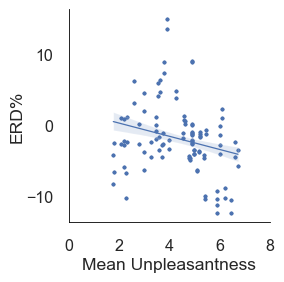

In [94]:
sns.set(style="white",font_scale=2.8/timesSmaller)

# Create scatter plot with regression line
sns.lmplot(x=xAxisCov, y=yAxis, data=df, height = figSize, 
           palette=pal, 
           scatter_kws={'s': dotsize}, line_kws={'lw' : lW} )

# Customize plot appearance

#plt.ylim(-10, 20)
plt.xlim(0,8)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(eW)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(eW)
plt.gca().tick_params(axis='both', which='both', pad=5) # change pad to make the axes labels further/closer to axis
plt.gca().xaxis.labelpad = 3 # space between axis label and data name
plt.gca().yaxis.labelpad = 1

plt.gca().set_ylabel('ERD%')
plt.gca().set_xlabel(covlabel)

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig9cov_" + covariate + "_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + "aved.svg", format='svg', dpi=1200, bbox_inches='tight')

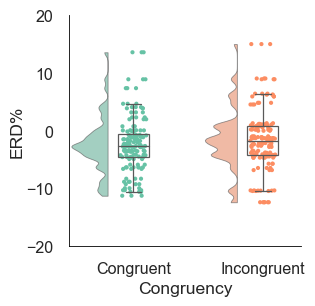

In [95]:
# Main effects of congruency

#f, ax = plt.subplots(figsize=(7, 7))
#f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxis, y = yAxis, data = df, palette = pal, bw = sigma*0.75,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = eW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth, 
                box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.set_ylim(-20, 20)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

ax.set_ylabel('ERD%')

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig10_cong4mcov_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + ".svg", format='svg', dpi=1200, bbox_inches='tight')

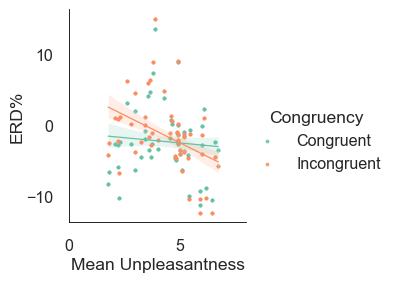

In [96]:
sns.set(style="white",font_scale=2.8/timesSmaller)

# Create scatter plot with regression line
sns.lmplot(x=xAxisCov, y=yAxis, hue=xAxis, data=df, height = figSize, 
           palette=pal, 
           scatter_kws={'s': dotsize}, line_kws={'lw' : lW} )

# Customize plot appearance

#plt.ylim(-10, 20)
plt.xlim(0,8)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(eW)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(eW)
plt.gca().tick_params(axis='both', which='both', pad=5) # change pad to make the axes labels further/closer to axis
plt.gca().xaxis.labelpad = 3 # space between axis label and data name
plt.gca().yaxis.labelpad = 1

plt.gca().set_ylabel('ERD%')
plt.gca().set_xlabel(covlabel)

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig11cov_cong_" + covariate + "_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + "aved.svg", format='svg', dpi=1200, bbox_inches='tight')

In [ ]:
## Covariates and Hemisphere -- to do and export in beta band

In [39]:
## Specific bits of the data to fig

version  = "070524" 
electrodeCluster = 1 # 1 = "Frontal", 3 = "Central", 4 = "Parietal", 5 = "Occipital"
freqBand = 8
covariate = "unp" # unp (mean unpleasantness), pd (pupil diameter) or int (mean intensity)
xAxisCov = "MeanUn" # PupilDiameter, MeanInt, MeanUn,
covlabel = "Mean Unpleasantness" #Pupil Diameter (mms), Mean Unpleasantness, Mean Intensity

yAxis = ("ERD_" + covariate + "_hem") #might have to rename the actual csv column name
print(yAxis)

ERD_unp_hem


In [40]:
path = "/Users/dhewitt/Data/pps/Exports/"
fileType = ".csv"
#fileName = ("PPSERDDataLong_Grouped_noav_" + version + "_plotting" + fileType)
fileName = ("adjustedRQ2hemcovdata_" + version + fileType) ## predicted data from lmes

figOutName = ("ERD_Grouped_" + version)

figs_dir = (path + 'figs/')
print(fileName)

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir(figs_dir):
        os.makedirs(figs_dir)
        
df = pd.read_csv(path + measureType + "/" + fileName)
df = df.loc[(df['Grouping1'] == electrodeCluster) & (df['FreqBand'] == freqBand) & (df['Block'] == 2)].dropna()
df

adjustedRQ2hemcovdata_070524.csv


,Unnamed: 0,X,ID,ElectrodeID,Timebin,FreqBand,EEGPowerChange,Block,Rep,Side,...,Elec_Runp,STAI_Total,PupilDiameter,GazeDirection,ElHem,CueSide,Cue,ElectrodeGroup,ERD_unp_hem,ERD_pupilD_hem
1872,1873,81,2,30,1,8,5.228200,2,1,1,...,5.00,66,0.015512,38.752618,Contra,left,Incongruent,Frontal,1.311695,na
1873,1874,82,2,31,1,8,-6.895022,2,1,1,...,5.00,66,0.015512,38.752618,Contra,left,Incongruent,Frontal,1.311695,na
1874,1875,83,2,32,1,8,19.671277,2,1,1,...,5.00,66,0.015512,38.752618,Contra,left,Incongruent,Frontal,1.311695,na
1875,1876,193,2,30,2,8,-10.759882,2,1,1,...,5.00,66,-0.058558,27.489831,Contra,left,Incongruent,Frontal,1.311695,na
1876,1877,194,2,31,2,8,-4.923485,2,1,1,...,5.00,66,-0.058558,27.489831,Contra,left,Incongruent,Frontal,1.311695,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,3740,17330,30,31,2,8,51.656567,2,2,2,...,6.33,81,-0.108885,5.827062,Ipsi,right,Incongruent,Frontal,9.418616,na
3740,3741,17331,30,32,2,8,2.309241,2,2,2,...,6.33,81,-0.108885,5.827062,Ipsi,right,Incongruent,Frontal,9.418616,na
3741,3742,17441,30,30,3,8,13.109227,2,2,2,...,6.33,81,-0.125147,7.172001,Ipsi,right,Incongruent,Frontal,9.418616,na
3742,3743,17442,30,31,3,8,8.443688,2,2,2,...,6.33,81,-0.125147,7.172001,Ipsi,right,Incongruent,Frontal,9.418616,na


In [41]:
cue_left = df[df['Side'] == 1]
cue_right = df[df['Side'] == 2]
cue_left_contra = cue_left[cue_left['ElSide'] == 1].copy()
cue_left_ipsi = cue_left[cue_left['ElSide'] == -1].copy()
cue_left_contra = cue_left_contra.reset_index(drop=True)
cue_left_ipsi = cue_left_ipsi.reset_index(drop=True)
cue_right_contra = cue_right[cue_right['ElSide'] == -1].copy()
cue_right_ipsi = cue_right[cue_right['ElSide'] == 1].copy()
cue_right_contra = cue_right_contra.reset_index(drop=True)
cue_right_ipsi = cue_right_ipsi.reset_index(drop=True)
cue_left_contra['Hemisphere'] = 'Contralateral'
cue_left_ipsi['Hemisphere'] = 'Ipsilateral'
cue_right_contra['Hemisphere'] = 'Contralateral'
cue_right_ipsi['Hemisphere'] = 'Ipsilateral'
elhem_df = pd.concat([cue_left_contra, cue_left_ipsi, cue_right_contra, cue_right_ipsi])
#elhem_df['Tonic Pain'] = elhem_df['Cue'].astype(str) + ' ' + elhem_df['Hemisphere'].astype(str)
elhem_df

## Averaging over block repetitions and all electrodes in the cluster
#elhem_df = elhem_df.groupby(['ID', 'Cue', 'Tonic Pain', xAxisHem, yAxis, xAxisCov]).mean().reset_index() #averaging because of repetitions which have the same predicted value
elhem_df = elhem_df.groupby(['ID', 'Cue', xAxisHem, yAxis, xAxisCov]).mean().reset_index() #averaging because of repetitions which have the same predicted value
elhem_df[yAxis] = pd.to_numeric(elhem_df[yAxis], errors='coerce')
elhem_df[xAxisCov] = pd.to_numeric(elhem_df[xAxisCov], errors='coerce')
elhem_df

,ID,Cue,Hemisphere,ERD_unp_hem,MeanUn,Unnamed: 0,X,ElectrodeID,Timebin,FreqBand,...,Sex,Age,Handed,Elec_Lpain,Elec_Lunp,Elec_Rpain,Elec_Runp,STAI_Total,PupilDiameter,GazeDirection
0,2,Congruent,Contralateral,3.076787,4.82,2813.0,183.0,2.666667,2.0,8.0,...,2.0,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.053621,31.046595
1,2,Congruent,Contralateral,12.353935,5.20,1886.0,530.0,31.000000,2.0,8.0,...,2.0,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.038613,7.184373
2,2,Congruent,Ipsilateral,3.332059,4.82,3281.0,194.0,31.000000,2.0,8.0,...,2.0,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.053621,31.046595
3,2,Congruent,Ipsilateral,13.080634,5.20,2354.0,519.0,2.666667,2.0,8.0,...,2.0,32.0,1.0,4.33,5.33,3.33,4.33,66.0,-0.038613,7.184373
4,2,Incongruent,Contralateral,1.311695,4.82,1877.0,194.0,31.000000,2.0,8.0,...,2.0,32.0,1.0,4.67,6.00,4.00,5.00,66.0,-0.021245,30.994602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,30,Congruent,Ipsilateral,14.015546,5.40,2804.0,17319.0,2.666667,2.0,8.0,...,2.0,28.0,1.0,5.00,5.33,6.33,6.33,81.0,-0.081196,5.125088
204,30,Incongruent,Contralateral,-4.940759,6.45,2327.0,16994.0,31.000000,2.0,8.0,...,2.0,28.0,1.0,6.00,6.33,7.33,7.67,81.0,-0.124805,-3.315622
205,30,Incongruent,Contralateral,10.788061,5.40,3272.0,17319.0,2.666667,2.0,8.0,...,2.0,28.0,1.0,5.00,5.33,6.33,6.33,81.0,-0.078928,7.253126
206,30,Incongruent,Ipsilateral,-7.720406,6.45,2795.0,16983.0,2.666667,2.0,8.0,...,2.0,28.0,1.0,6.00,6.33,7.33,7.67,81.0,-0.124805,-3.315622


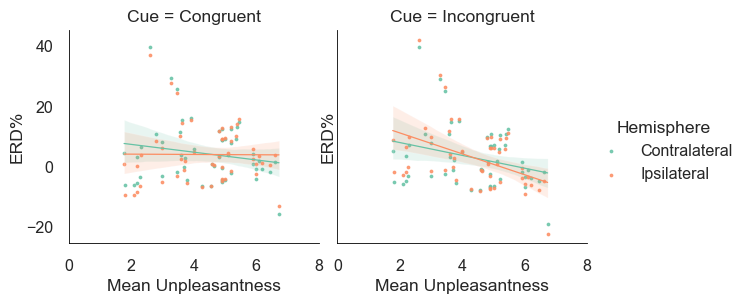

In [45]:

lmplot = sns.lmplot(x=xAxisCov, y=yAxis, hue=xAxisHem, col='Cue', data=elhem_df,
                    palette=pal, scatter_kws={'s': dotsize}, line_kws={'lw': lW},
                    height=figSize, aspect=1)

for ax in lmplot.axes.flat:
    ax.set_xlim(0, 8) #for mean int or unp
    ax.set_ylabel('ERD%')
    ax.set_xlabel(covlabel)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(eW)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(eW)
    ax.tick_params(axis='both', which='both', pad=5)  # change pad to make the axes labels further/closer to axis
    ax.xaxis.labelpad = 3  # space between axis label and data name
    ax.yaxis.labelpad = 1

#Save figure if needed
if savefigs:
    plt.savefig(figs_dir + figOutName + "_fig12hem_cov_cong_" + covariate + "_" + str(freqBand) + "Hz_Cluster" + str(electrodeCluster) + "aved.svg", format='svg', dpi=1200, bbox_inches='tight')

plt.show()


In [64]:
df['Congruency'] = df['Congruency'].replace({1 : "Incongruent", 2 : "Congruent"})
df['Congruency'] = pd.Categorical(df['Congruency'], categories=["Congruent", "Incongruent"], ordered=True)

df

KeyError: 'Congruency'